In [89]:
cd /home/mil/kawana/workspace/superquadric_parsing/supershape

/home/mil/kawana/workspace/superquadric_parsing/supershape


In [90]:
from models import super_shape
from models import super_shape_sampler
import utils
import torch
from torch import nn
import math
from layers import super_shape_functions
from external.QuaterNet.common import quaternion
import numpy as np
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [91]:

batch = 1
m = 4
n = 2
n1 = 1
n2 = 1
n3 = 1
a = 1
b = 1
P = 50
dim = 2

rotations = [[0.], [math.pi / 2.]]
transitions = [[0., 0.], [1., 0.]]
linear_scales = [[1., 1.]] * n

sampler = super_shape_sampler.SuperShapeSampler(m, n, dim=dim)
preset_params = utils.generate_multiple_primitive_params(
    m,
    n1,
    n2,
    n3,
    a,
    b,
    rotations_angle=rotations,
    transitions=transitions,
    linear_scales=linear_scales)

# B, P, dim - 1
grid_range = [0, 2 * math.pi]
batched_theta_test_tensor = torch.linspace(grid_range[0], grid_range[1], batch * P).view(batch, P, dim - 1)

assert [*batched_theta_test_tensor.shape] == [batch, P ** (dim - 1), dim - 1], batched_theta_test_tensor.shape
batched_radius_tensor = sampler.transform_circumference_angle_to_super_shape_radius(
        batched_theta_test_tensor, preset_params)
#batched_radius_tensor = torch.tensor([0.5] * batch * n * P *
#                                        (dim - 1)).view(batch, n, P, dim - 1)
points = sampler.transform_circumference_angle_to_super_shape_world_cartesian_coord(
    batched_theta_test_tensor, batched_radius_tensor, preset_params)
print(points.shape)

torch.Size([1, 2, 50, 2])


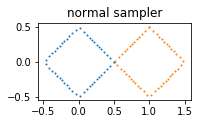

In [92]:
fig2 = plt.figure()
g2 = fig2.add_subplot(1, 2, 1)
points_reshaped = points.view(n, -1, dim).detach().cpu().numpy()
plots = []
marker_opt = dict(size=1)
for idx in range(n):
    x=points_reshaped[idx, :, 0]
    y=points_reshaped[idx, :, 1]
    g2.set_title('normal sampler')
    g2.set_aspect('equal')
    g2.scatter(x, y, s=1)



In [93]:

batch = 1
m = 4
n = 2
n1 = 1
n2 = 1
n3 = 1
a = 1
b = 1
P = 50
dim = 3

rotations = [[0., 0., 0.], [0., math.pi / 2., math.pi / 2.]]
rotations = [[0., 0., 0.], [0., math.pi / 2., 0.]]

transitions = [[0., 0., 0.], [1., 0., 0.]]
linear_scales = [[1., 1., 1.]] * n

sampler = super_shape_sampler.SuperShapeSampler(m, n, dim=dim)
preset_params = utils.generate_multiple_primitive_params(
    m,
    n1,
    n2,
    n3,
    a,
    b,
    rotations_angle=rotations,
    transitions=transitions,
    linear_scales=linear_scales)

# B, P, dim - 1
grid_range = [0, 2 * math.pi]
batched_theta_test_tensor = utils.generate_grid_samples(grid_range,
                                        batch=batch,
                                        dim=dim - 1,
                                        sample_num=P)
#batched_theta_test_tensor = torch.cat([s.reshape(batch, P ** (dim - 1), 1) for s in torch.meshgrid([torch.linspace(-math.pi/2, math.pi/2, batch * P),
#                                            torch.linspace(-math.pi, math.pi, batch * P)])], axis=-1)

assert [*batched_theta_test_tensor.shape] == [batch, P ** (dim - 1), dim - 1], batched_theta_test_tensor.shape
batched_radius_tensor = sampler.transform_circumference_angle_to_super_shape_radius(
        batched_theta_test_tensor, preset_params)
#batched_radius_tensor = torch.tensor([0.5] * batch * n * P *
#                                        (dim - 1)).view(batch, n, P, dim - 1)
points = sampler.transform_circumference_angle_to_super_shape_world_cartesian_coord(
    batched_theta_test_tensor, batched_radius_tensor, preset_params)
print(points.shape)

torch.Size([1, 2, 2500, 3])


In [94]:
points_reshaped = points.view(n, -1, dim).detach().cpu().numpy()
plots = []
marker_opt = dict(size=1)
for idx in range(n):
    x=points_reshaped[idx, :, 0]
    y=points_reshaped[idx, :, 1]
    z=points_reshaped[idx, :, 2]
    plots.append(go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers', marker=marker_opt))
fig = go.Figure(data=plots)
layout = go.Layout(yaxis=dict(scaleanchor="x", scaleratio=1))
fig.update_layout(layout)
fig.show()